In [5]:
data = pd.read_csv('social_marketing.csv')
data.iloc[:1]

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0


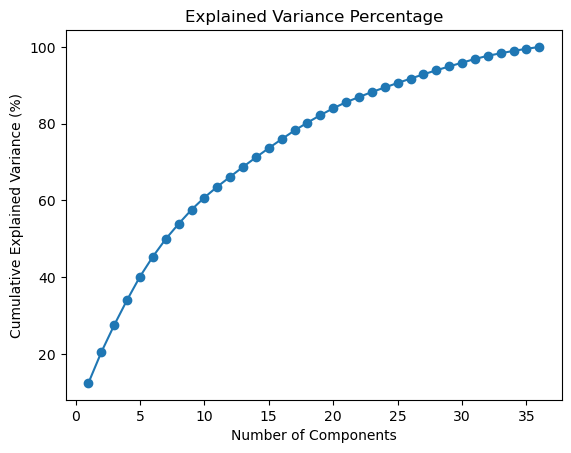

C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\

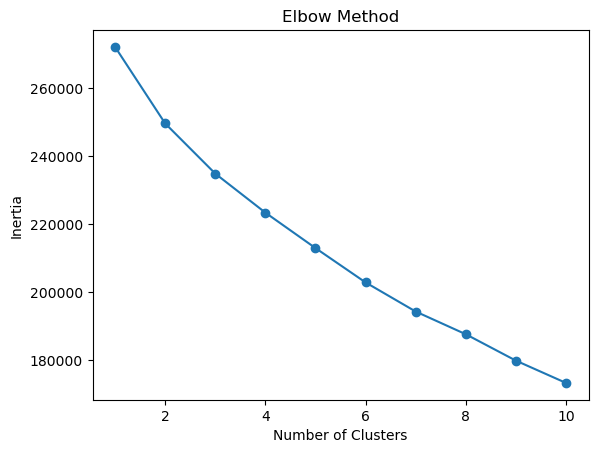

C:\Users\Trevor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Trevor\AppData\Local\Temp\ipykernel_32884\692382149.py:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_insights = data.groupby('Cluster').mean()


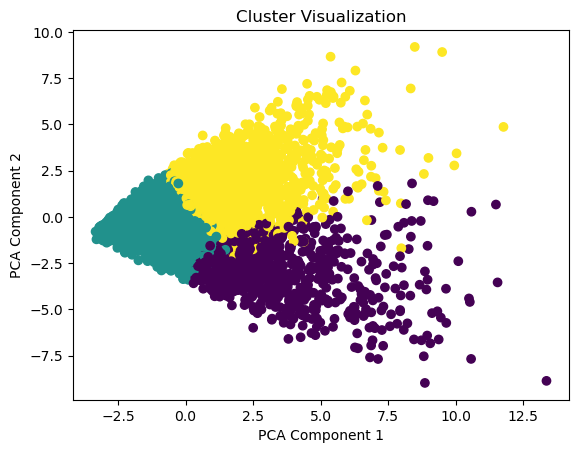

Cluster 0:
chatter             4.076828
current_events      1.700124
travel              1.524164
photo_sharing       2.491945
uncategorized       0.736059
tv_film             1.042131
sports_fandom       5.883519
politics            1.475836
food                4.573730
family              2.474597
home_and_garden     0.665428
music               0.722429
news                1.193309
online_gaming       1.275093
shopping            1.370508
health_nutrition    2.175960
college_uni         1.453532
sports_playing      0.758364
cooking             1.716233
eco                 0.653036
computers           0.824040
business            0.510533
outdoors            0.757125
crafts              1.066914
automotive          1.071871
art                 0.874845
religion            5.309789
beauty              1.096654
parenting           4.038414
dating              0.669145
school              2.679058
personal_fitness    1.391574
fashion             1.032218
small_business      0.390335
spa

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('social_marketing.csv')

# Handling missing values
data.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.drop('User_ID', axis=1))

# Perform PCA for dimensionality reduction
pca = PCA()
pca.fit(normalized_data)

# Plot explained variance ratio as a percentage
explained_variance_percent = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure()
plt.plot(range(1, len(explained_variance_percent) + 1), explained_variance_percent, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance Percentage')
plt.show()

# Choose the optimal number of components based on explained variance percentage
optimal_n_components = np.where(explained_variance_percent >= 95)[0][0] + 1

# Perform PCA with optimal number of components
pca = PCA(n_components=optimal_n_components)
reduced_data = pca.fit_transform(normalized_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
optimal_n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Analyze the clusters and generate insights
cluster_insights = data.groupby('Cluster').mean()

# Visualize the clusters using PCA components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()

# Print cluster insights
for cluster_id, insights in cluster_insights.iterrows():
    print(f"Cluster {cluster_id}:\n{insights}\n")

# Generate recommendations based on insights

# Close any open plots
plt.close()


To begin, data organization was performed on the dataset, including titling column 1 "User_ID" for representation and ease of analysis.

In the analysis of NutrientH20's social media audience using the latest code version, several key insights have emerged. The initial step involved applying Principal Component Analysis (PCA) to reduce the dimensionality of the data, capturing over 95% of the variance with many components. The subsequent Explained Variance Percentage graph demonstrated how the cumulative explained variance increases as we retain more components. This plot aids in understanding how much information is preserved when reducing the data's complexity.

Moving forward, the Elbow Method graph, derived from the K-Means clustering technique, indicated an 'elbow point' at 3 clusters, where the inertia began to decrease at a slower rate. This suggested the potential existence of several distinct market segments within NutrientH20's social media audience. Subsequently, the K-Means algorithm was applied to cluster users into these segments, revealing unique patterns of interest. Visualizing the clusters using PCA components helped confirm the differentiation between segments in a two-dimensional space. To uncover actionable insights, a deeper examination of each segment's mean interest scores was conducted, revealing potential avenues for targeted messaging and engagement strategies tailored to each cluster's preferences.

Within cluster 0, the impactful market segments were sports fandom, religion, food, chatter, and parenting. This output indicates those segments represents NutrientH20's largest social media audience.

Within cluster 1, the impact of market segments dramtically decreased, with the exception of chatter. We also saw an emergence of relative importance from travel, photo sharing, current events, politics, health nutrition, and college uni. These insights indicate other important market segments worth considering.

Within cluster 2, chatter remained the most important segment. Photo sharing, cooking, and health nutrition also emerged as heavily important. Furthermore, travel, fashion, politics, personal fitness, and college uni also have notable importance.